# Predicting Airlines Delays

## Introduction

Flight delays has become a concern issue for airline companies around the world due to the associated financial loses to both aviation industry and passengers. Between 2019 and 2020, around 19% of airline flights from major carriers in United States were delayed affecting the journey of many passengers (Bureau of Transport Statistics, 2019). In this project, we will use machine learning models to predict if the flight will be delayed.

Definition of delayed flight:

* Flight that arrives late at its destination
* If the flight has any delays from its departure, but still arrives to its destination on time, it will not be considered a delayed flight
* Flight that arrive on time is denoted as 0
* Flight that delayed is denoted as 1

## About Dataset
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.The original dataset can be downloaded from Kaggle : https://www.kaggle.com/datasets/eugeniyosetrov/airline-delays/data

## Objectives

* To identify attributes that affect flight delay
* To develop machine learning models that classify flights outcome (delayed or not delayed) with selected attributes 
* To evaluate performance of different machine learning model

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
myfile_path = '/mnt/c/Users/MLL591/OneDrive/Research/Python/Swetha_learning/git/airline_delay_analysis/data/airline_delay.csv'
df = pd.read_csv(myfile_path)
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,...,0.0,0.80,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0
3347,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,...,0.0,5.12,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0
3348,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,...,0.0,0.00,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0
3349,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,...,0.0,0.00,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3351.0,2019.459266,0.498412,2019.0,2019.00,2019.00,2020.000,2020.00
month,3351.0,12.000000,0.000000,12.0,12.00,12.00,12.000,12.00
arr_flights,3343.0,298.271014,852.436335,1.0,35.00,83.00,194.500,19713.00
arr_del15,3343.0,50.995214,146.484456,0.0,5.00,12.00,33.000,2289.00
carrier_ct,3343.0,16.065337,41.759516,0.0,1.49,4.75,12.255,697.00
weather_ct,3343.0,1.443144,4.821657,0.0,0.00,0.06,1.010,89.42
nas_ct,3343.0,16.183383,56.423008,0.0,0.82,2.98,8.870,1039.54
security_ct,3343.0,0.137320,0.646479,0.0,0.00,0.00,0.000,17.31
late_aircraft_ct,3343.0,17.166069,55.447043,0.0,0.90,3.28,10.240,819.66
arr_cancelled,3343.0,2.884535,10.126658,0.0,0.00,0.00,2.000,224.00


In [5]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['year', 'month', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

Categorical Columns:
['carrier', 'carrier_name', 'airport', 'airport_name']


In [6]:
# checking for missing values in our data

df.isna().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64

### Handling Missing Values in Flight Data:
In this dataset, we're dealing with flight-related data, including flight counts and various delay components. We'll handle missing values as follows:

Flight Count Columns (e.g., 'arr_flights'):

These columns represent counts of flights arriving at airports, which are discrete values. We'll fill missing values in these columns with the mode (most frequent value). This choice ensures that missing values are replaced with values that represent the typical number of flights for the given conditions.

Delay Component Columns (e.g., 'arr_del15', 'carrier_ct', 'weather_ct', etc.):

These columns represent time intervals or counts related to different delay causes. For columns related to counts, we'll fill missing values with the mode (most frequent count). For columns related to time intervals, we'll fill missing values with the median, particularly if the data distribution is skewed due to potential outliers. Using the median for time intervals is a robust choice that mitigates the impact of extreme values. Here's the complete Python code to implement this data preprocessing:

In [7]:
from sklearn.impute import SimpleImputer

# Initialize imputers with the desired strategy
count_imputer = SimpleImputer(strategy='most_frequent')
time_interval_imputer = SimpleImputer(strategy='median')

# List of columns to impute with mode (counts)
count_columns_to_impute = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']

# List of columns to impute with median (time intervals)
time_interval_columns_to_impute = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Apply imputation to the respective columns
df[count_columns_to_impute] = count_imputer.fit_transform(df[count_columns_to_impute])
df[time_interval_columns_to_impute] = time_interval_imputer.fit_transform(df[time_interval_columns_to_impute])

In [8]:
# checking again
df.isna().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

Handling missing data is key in machine learning. Our approach can change as we progress and learn more about our project. We stay flexible, ready to try different techniques to improve our models. This iterative process is a core principle of data science, helping us continuously improve our predictions.

### Exploring Carriers
First, let's examine the unique carriers in the dataset and visualize their distribution:

Unique Carriers: 17


/tmp/ipykernel_1014/1387375168.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=carrier_counts.index, y=carrier_counts.values, palette="Spectral")


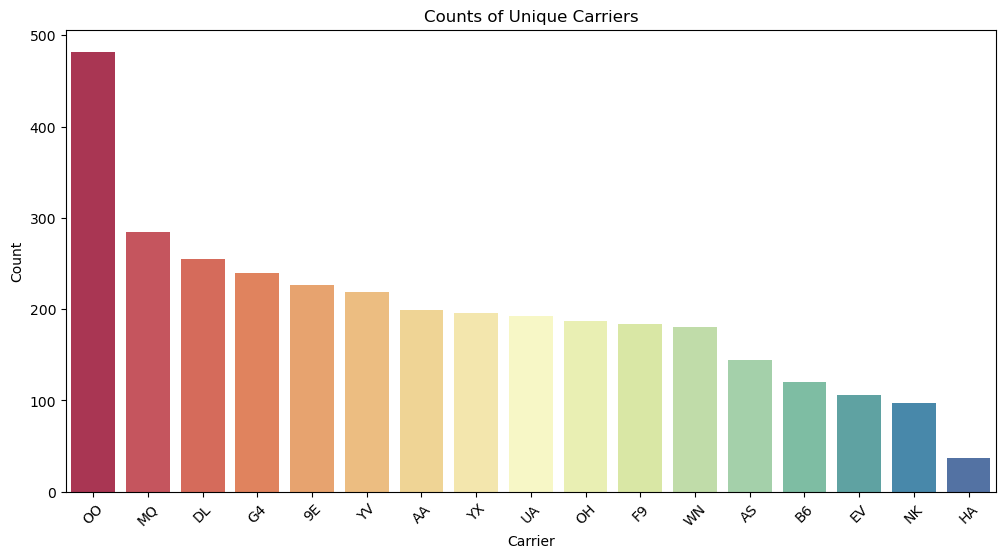

In [9]:
# Explore unique carriers
unique_carriers = df['carrier'].unique()
print("Unique Carriers:", len(unique_carriers))

# Count the occurrences of each carrier
carrier_counts = df['carrier'].value_counts()

# Create a bar plot for carrier counts
plt.figure(figsize=(12, 6))
sb.barplot(x=carrier_counts.index, y=carrier_counts.values, palette="Spectral")
plt.title("Counts of Unique Carriers")
plt.xlabel("Carrier")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_1014/3474713454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='year', y='arr_flights', data=flight_trend, palette='Spectral')


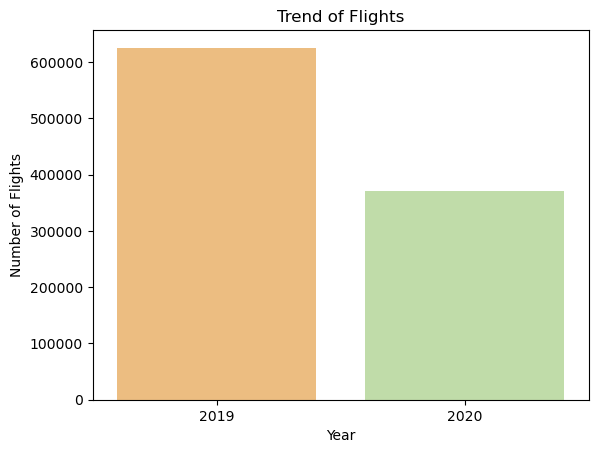

In [10]:
# Prepare data for plotting
flight_trend = df.groupby(['year'])['arr_flights'].sum().reset_index()

# Create bar plot with seaborn
sb.barplot(x='year', y='arr_flights', data=flight_trend, palette='Spectral')

# Set labels and title
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Number of Flights')
plt.title('Trend of Flights')

# Show the plot
plt.show()

Since there is no information about different months of each year, it is difficult to see the trend of airplane flight.

/tmp/ipykernel_1014/2722480895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=carrier_delay_counts.index, y=carrier_delay_counts.values, palette="Spectral")


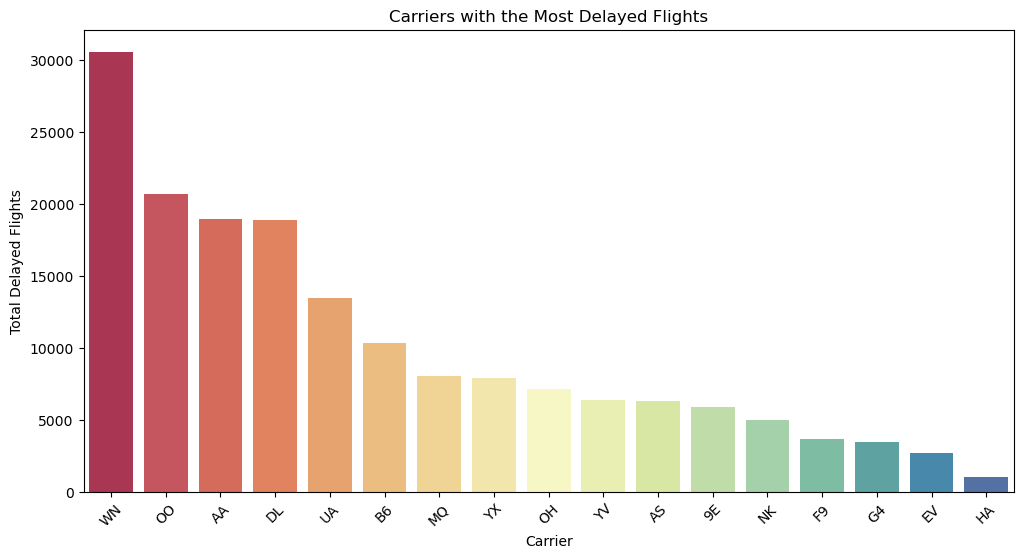

In [11]:
# Group data by carrier and calculate the total number of delayed flights
carrier_delay_counts = df.groupby('carrier')['arr_del15'].sum().sort_values(ascending=False)

# Create a bar plot for carriers with the most delayed flights
plt.figure(figsize=(12, 6))
sb.barplot(x=carrier_delay_counts.index, y=carrier_delay_counts.values, palette="Spectral")
plt.title("Carriers with the Most Delayed Flights")
plt.xlabel("Carrier")
plt.ylabel("Total Delayed Flights")
plt.xticks(rotation=45)
plt.show()

Now that we know which carriers have the highest number of delayed flights, let's proceed to analyze delay patterns to understand the possible reasons for the reduction in flights. We can start by examining the types of delays (e.g., carrier delays, weather-related delays, NAS delays) and how they contribute to flight delays. This analysis will provide insights into whether specific types of delays have a significant impact on flight schedules.

To do this, we'll create a stacked bar plot that shows the distribution of different types of delays for the carriers with the highest number of delayed flights. Here's the code to generate the plot

In [12]:
# Select the top carriers with the most delayed flights
top_carriers = carrier_delay_counts.index

# Filter the dataset to include only the top carriers
top_carrier_data = df[df['carrier'].isin(top_carriers)]

# Group the data by carrier and sum the delay components
delay_components = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
delay_data = top_carrier_data.groupby('carrier')[delay_components].sum()

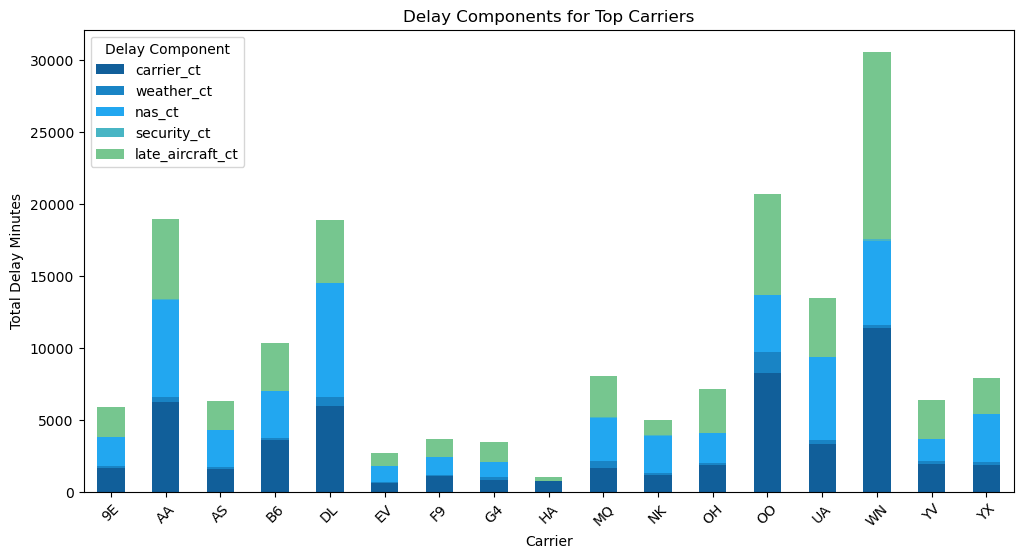

In [13]:

# Define your custom colors
colors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]

# Create a stacked bar plot with custom colors
delay_data.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))

# Set labels and title
plt.title("Delay Components for Top Carriers")
plt.xlabel("Carrier")
plt.ylabel("Total Delay Minutes")
plt.xticks(rotation=45)
plt.legend(title="Delay Component")

# Show the plot
plt.show()

The stacked bar plot shows that security delays contribute least to flight delays among top carriers. National Aviation System delays, carrier delays, and late aircraft delays have a larger impact. To understand flight reduction in 2020, we should:

* Study trends in National Aviation System and late aircraft delays.
* Check if specific carriers are more affected by these delays.
* Consider external factors like weather and airport operations.
* Assess the impact of these delays on passenger satisfaction and airline operations.
* This analysis can help improve airline efficiency and passenger experiences.

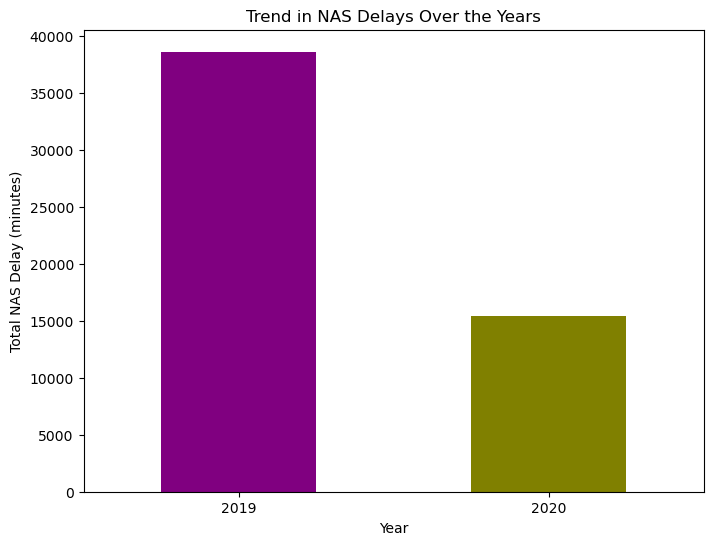

In [14]:
# Group the data by year and calculate the total NAS delays for each year
nas_delay_trend = df.groupby('year')['nas_ct'].sum()

# Create a bar plot to visualize the NAS delay trends
plt.figure(figsize=(8, 6))
nas_delay_trend.plot(kind='bar', color=['purple', 'olive'])
plt.title('Trend in NAS Delays Over the Years')
plt.xlabel('Year')
plt.ylabel('Total NAS Delay (minutes)')
plt.xticks(rotation=0)
plt.show()


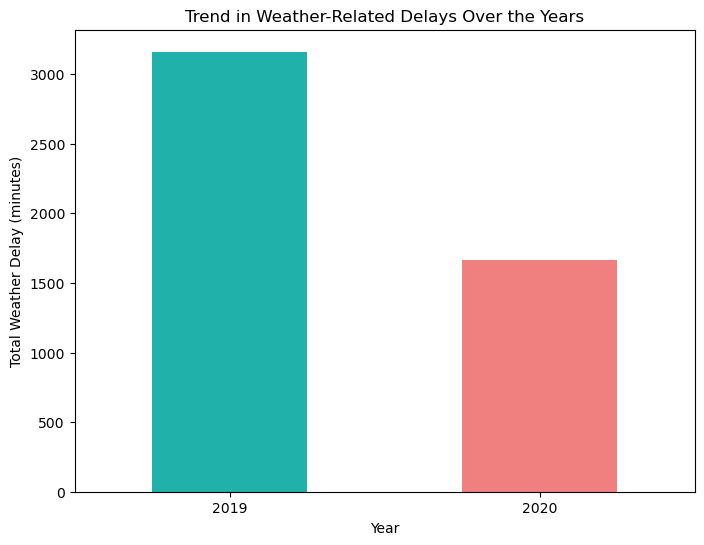

In [15]:
# Group the data by year and calculate the total weather delays for each year
weather_delay_trend = df.groupby('year')['weather_ct'].sum()

# Create a bar plot to visualize the weather delay trends
plt.figure(figsize=(8, 6))
weather_delay_trend.plot(kind='bar', color=['lightseagreen', 'lightcoral'])
plt.title('Trend in Weather-Related Delays Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Weather Delay (minutes)')
plt.xticks(rotation=0)
plt.show()

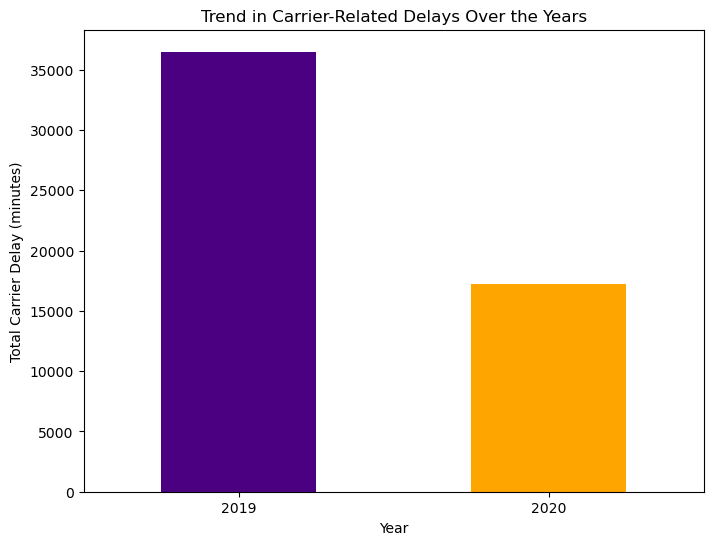

In [16]:
# Group the data by year and calculate the total Carrier delays for each year
nas_delay_trend = df.groupby('year')['carrier_ct'].sum()

# Create a bar plot to visualize the NAS delay trends
plt.figure(figsize=(8, 6))
nas_delay_trend.plot(kind='bar', color=['indigo', 'orange'])
plt.title('Trend in Carrier-Related Delays Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Carrier Delay (minutes)')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_1014/1539837003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=avg_nas_delay_by_carrier.values, y=avg_nas_delay_by_carrier.index, palette="PiYG")


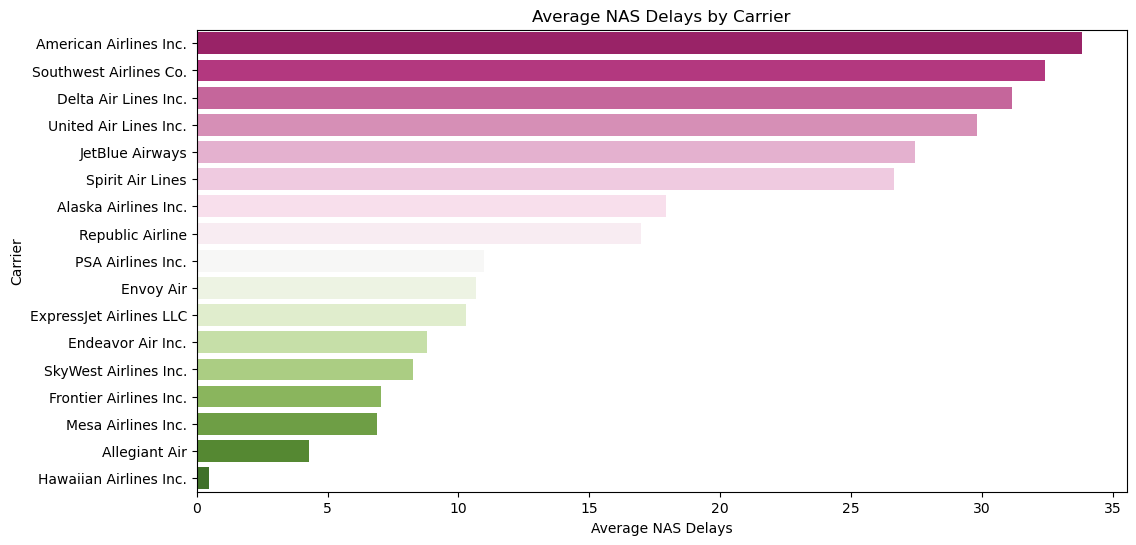

In [17]:
# Calculate the average NAS delays for each carrier
avg_nas_delay_by_carrier = df.groupby('carrier_name')['nas_ct'].mean().sort_values(ascending=False)

# Create a bar plot to visualize carrier-specific NAS delays
plt.figure(figsize=(12, 6))
sb.barplot(x=avg_nas_delay_by_carrier.values, y=avg_nas_delay_by_carrier.index, palette="PiYG")
plt.title('Average NAS Delays by Carrier')
plt.xlabel('Average NAS Delays')
plt.ylabel('Carrier')
plt.show() 

/tmp/ipykernel_1014/2840722004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=avg_late_aircraft_delay_by_carrier.values, y=avg_late_aircraft_delay_by_carrier.index, palette="viridis")


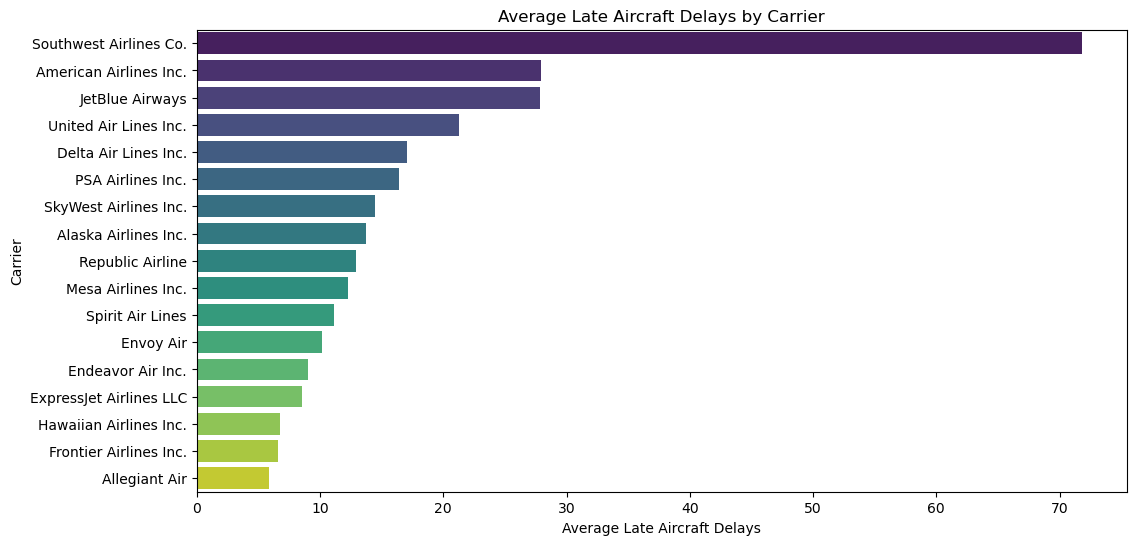

In [18]:
# Calculate the average late aircraft delays for each carrier
avg_late_aircraft_delay_by_carrier = df.groupby('carrier_name')['late_aircraft_ct'].mean().sort_values(ascending=False)

# Create a bar plot to visualize carrier-specific late aircraft delays
plt.figure(figsize=(12, 6))
sb.barplot(x=avg_late_aircraft_delay_by_carrier.values, y=avg_late_aircraft_delay_by_carrier.index, palette="viridis")
plt.title('Average Late Aircraft Delays by Carrier')
plt.xlabel('Average Late Aircraft Delays')
plt.ylabel('Carrier')
plt.show()

/tmp/ipykernel_1014/966569585.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=avg_carrier_ct_delay_by_carrier.values, y=avg_carrier_ct_delay_by_carrier.index, palette="flare")


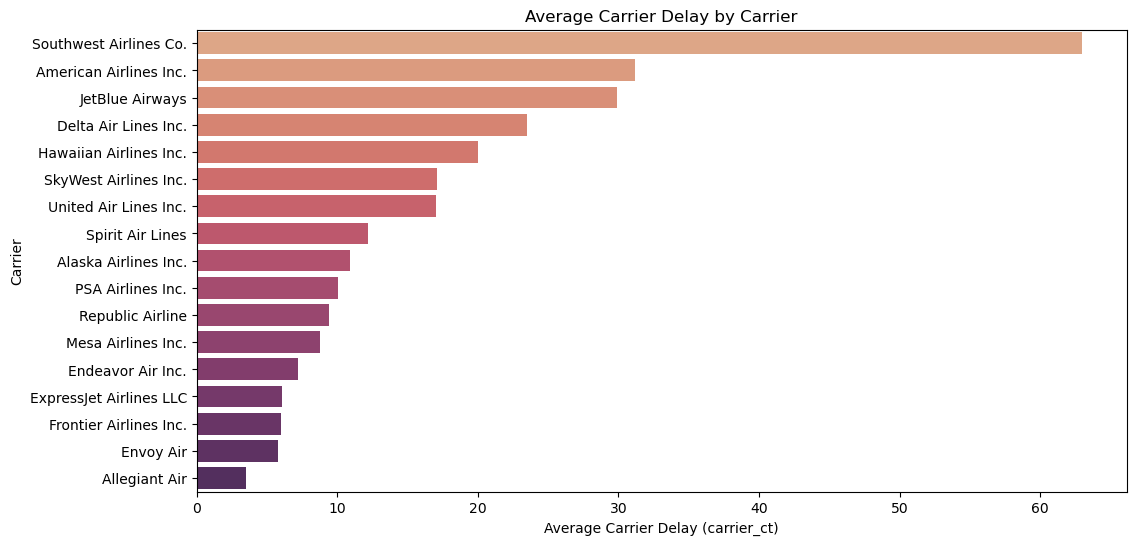

In [19]:
# Calculate the average carrier_ct delays for each carrier
avg_carrier_ct_delay_by_carrier = df.groupby('carrier_name')['carrier_ct'].mean().sort_values(ascending=False)

# Create a bar plot to visualize carrier-specific carrier_ct delays
plt.figure(figsize=(12, 6))
sb.barplot(x=avg_carrier_ct_delay_by_carrier.values, y=avg_carrier_ct_delay_by_carrier.index, palette="flare")
plt.title('Average Carrier Delay by Carrier')
plt.xlabel('Average Carrier Delay (carrier_ct)')
plt.ylabel('Carrier')
plt.show()

Let's analyze flight delays by airport. We'll calculate the total flight delays for each airport and visualize the results. Here's how you can do it:

/tmp/ipykernel_1014/2745123225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=airport_delay_totals.head(top_airports).values, y=airport_delay_totals.head(top_airports).index, palette="Spectral")


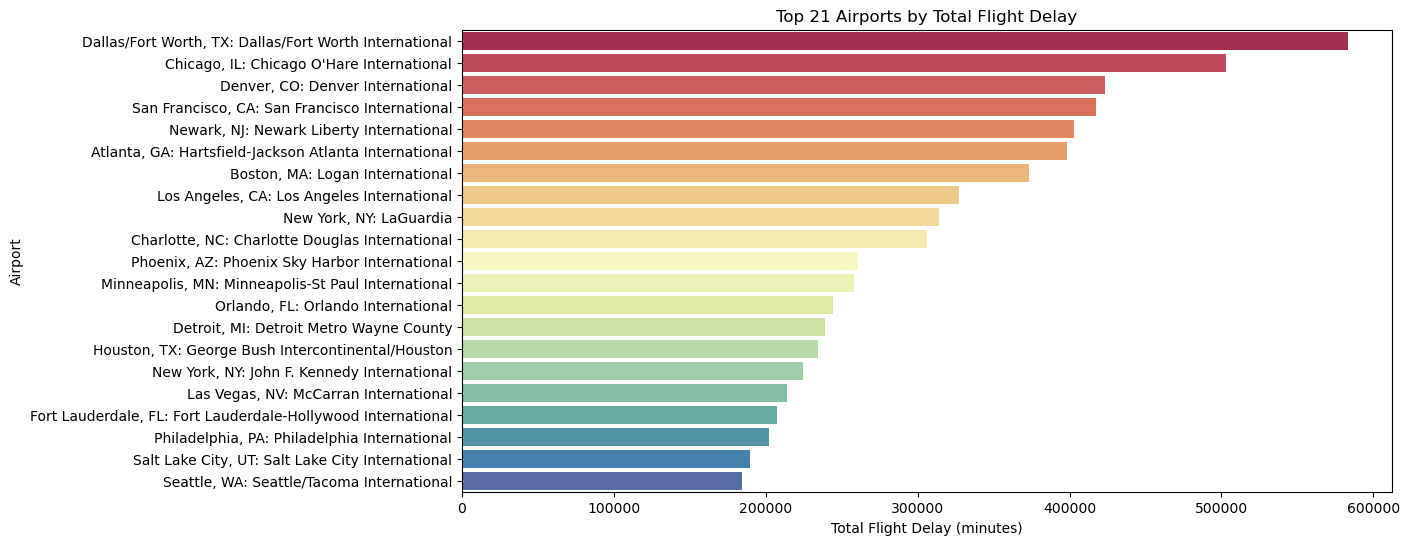

In [20]:
# Group the data by airport and calculate the total flight delays for each airport
airport_delay_totals = df.groupby('airport_name')['arr_delay'].sum()

# Sort the airports by total delay in descending order
airport_delay_totals = airport_delay_totals.sort_values(ascending=False)

# Create a bar plot to visualize airport-specific delay totals (top N airports)
top_airports = 21  # You can change this value to show the top N airports
plt.figure(figsize=(12, 6))
sb.barplot(x=airport_delay_totals.head(top_airports).values, y=airport_delay_totals.head(top_airports).index, palette="Spectral")
plt.title(f'Top {top_airports} Airports by Total Flight Delay')
plt.xlabel('Total Flight Delay (minutes)')
plt.ylabel('Airport')
plt.show()

# You can adjust the top_airports variable to show a different number of top airports, depending on your preference.

#### Scatter Plot of Arrival Delays vs. Departure Delays:

In this scatter plot, we are comparing arrival delays (x-axis) to departure delays (y-axis) for each airport. The goal is to uncover if there is a relationship between delays that occur during departure and those that occur during arrival. This plot can help us understand whether airports experiencing higher departure delays tend to have corresponding higher arrival delays, which may indicate systemic issues in airport operations.



/tmp/ipykernel_1014/1061920257.py:2: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df['arr_del15'], df['arr_delay'], alpha=0.5, c='purple', edgecolors='k', marker='x')


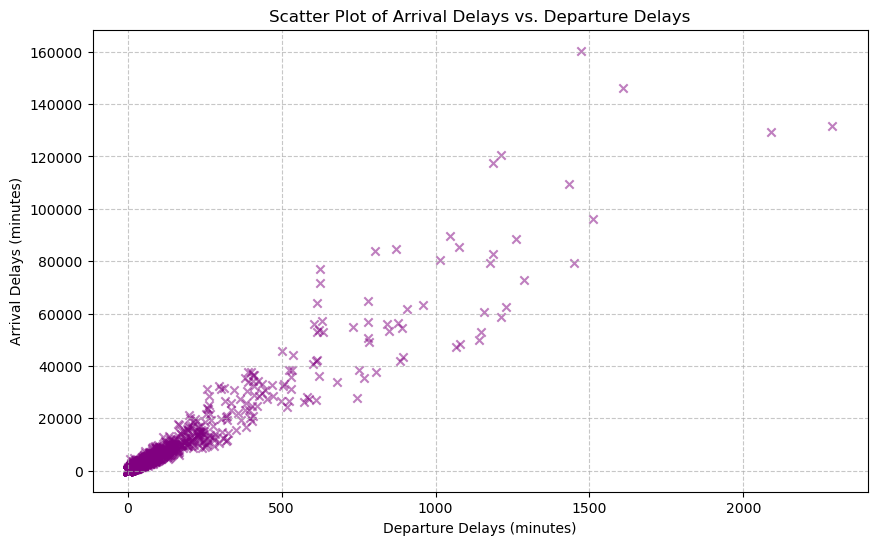

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['arr_del15'], df['arr_delay'], alpha=0.5, c='purple', edgecolors='k', marker='x')
plt.title('Scatter Plot of Arrival Delays vs. Departure Delays')
plt.xlabel('Departure Delays (minutes)')
plt.ylabel('Arrival Delays (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Different carriers perform in terms of on-time arrivals**

/tmp/ipykernel_1014/673888291.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=on_time_arrival_rate.index, y=on_time_arrival_rate.values, palette="pastel")


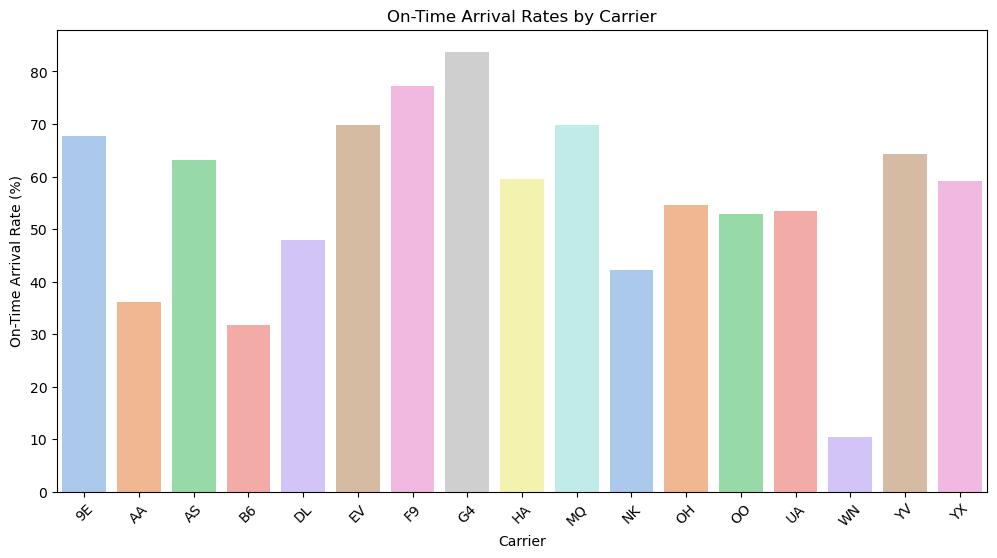

In [22]:
# Define the threshold for on-time arrivals (e.g., within 15 minutes)
on_time_threshold = 15

# Calculate the number of on-time arrivals for each carrier
on_time_flights_by_carrier = df[df['arr_del15'] <= on_time_threshold]['carrier'].value_counts()

# Calculate the total number of flights operated by each carrier
total_flights_by_carrier = df['carrier'].value_counts()

# Calculate the on-time arrival rate for each carrier
on_time_arrival_rate = (on_time_flights_by_carrier / total_flights_by_carrier) * 100

# Create a bar plot to visualize on-time arrival rates for different carriers
plt.figure(figsize=(12, 6))
sb.barplot(x=on_time_arrival_rate.index, y=on_time_arrival_rate.values, palette="pastel")
plt.title('On-Time Arrival Rates by Carrier')
plt.xlabel('Carrier')
plt.ylabel('On-Time Arrival Rate (%)')
plt.xticks(rotation=45)
plt.show()

**A correlation between the number of flights and the number of delays for each carrier**

/tmp/ipykernel_1014/1680117709.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(total_flights_by_carrier, total_delays_by_carrier, alpha=1,c='magenta', edgecolors='k', marker='x')


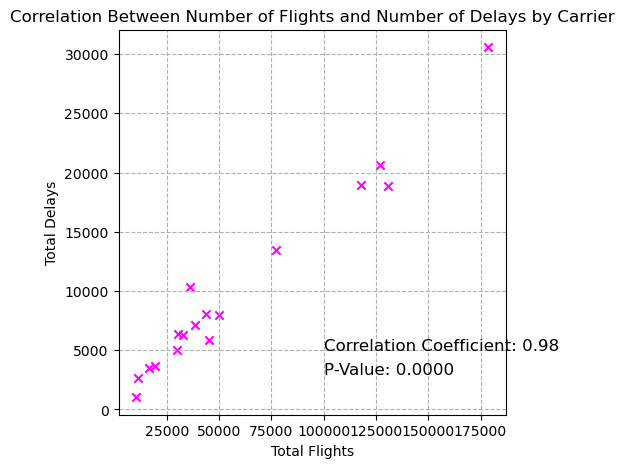

In [23]:
from scipy.stats import pearsonr

# Calculate the total number of flights operated by each carrier
total_flights_by_carrier = df.groupby('carrier')['arr_flights'].sum()

# Calculate the total number of delays for each carrier
total_delays_by_carrier = df.groupby('carrier')['arr_del15'].sum()

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(total_flights_by_carrier, total_delays_by_carrier)

# Visualize the correlation using a scatter plot
plt.figure(figsize=(5,5))
plt.scatter(total_flights_by_carrier, total_delays_by_carrier, alpha=1,c='magenta', edgecolors='k', marker='x')
plt.title('Correlation Between Number of Flights and Number of Delays by Carrier')
plt.xlabel('Total Flights')
plt.ylabel('Total Delays')
plt.grid(True, linestyle='--', alpha=1)

# Display the Pearson correlation coefficient and p-value on the plot
plt.text(100000, 5000, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)
plt.text(100000, 3000, f'P-Value: {p_value:.4f}', fontsize=12)

plt.show()

A Pearson correlation coefficient of 0.98 with a p-value of 0.00 indicates a very strong positive linear correlation between the total number of flights operated by carriers and the total number of delays they experience. This analysis uncovers a strong positive relationship between the total number of flights and the total number of delays for carriers. While this correlation is statistically significant, it also implies that carriers with higher flight volumes may need to implement strategies to manage and reduce delays to enhance their overall performance.

**Specifc airports that consistently have higher delays**

/tmp/ipykernel_1014/1730725835.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_airports.values, y=top_airports.index, palette='husl')


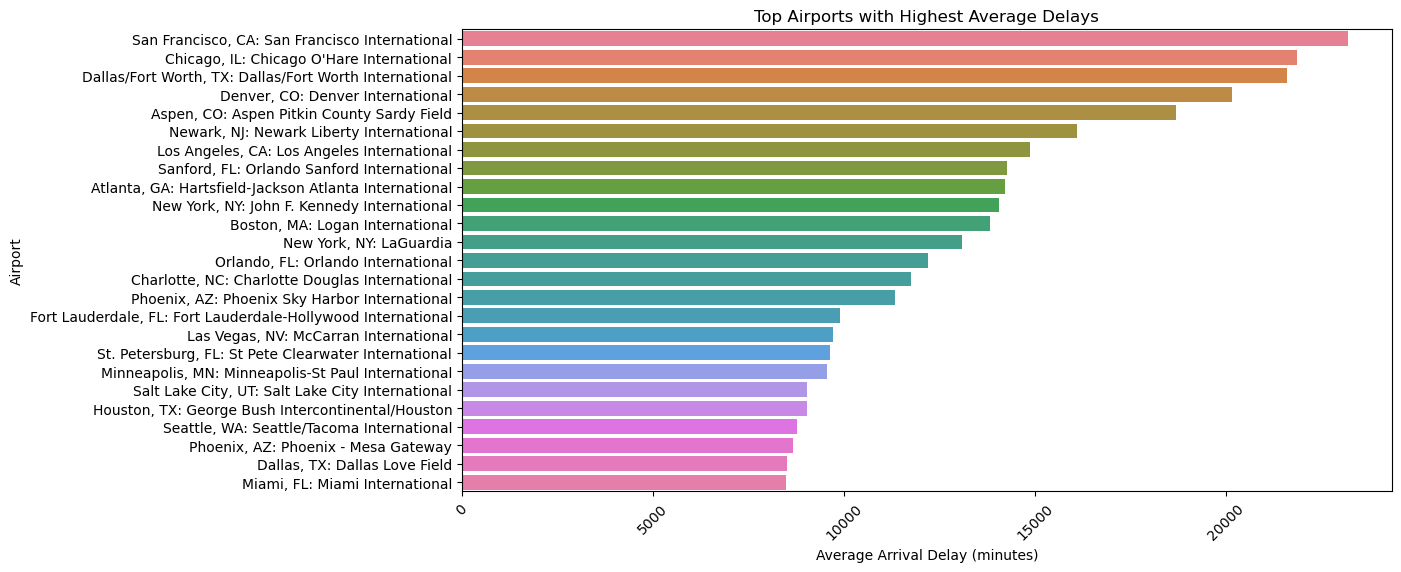

In [24]:
# Group the data by airport and calculate the average arrival delay
average_delay_by_airport = df.groupby('airport_name')['arr_delay'].mean().sort_values(ascending=False)

# Select the top N airports with the highest average delays (you can change N to your desired number)
top_airports = average_delay_by_airport.head(25)

# Create a bar plot to visualize the top airports with the highest average delays
plt.figure(figsize=(12, 6))
sb.barplot(x=top_airports.values, y=top_airports.index, palette='husl')
plt.title('Top Airports with Highest Average Delays')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Airport')
plt.xticks(rotation=45)
plt.show()

The "Average Arrival Delay" analysis calculates the average delay per flight arriving at each airport. This can help identify airports where, on average, flights tend to arrive later than scheduled.

**Total number of cancelled flights by carrier**

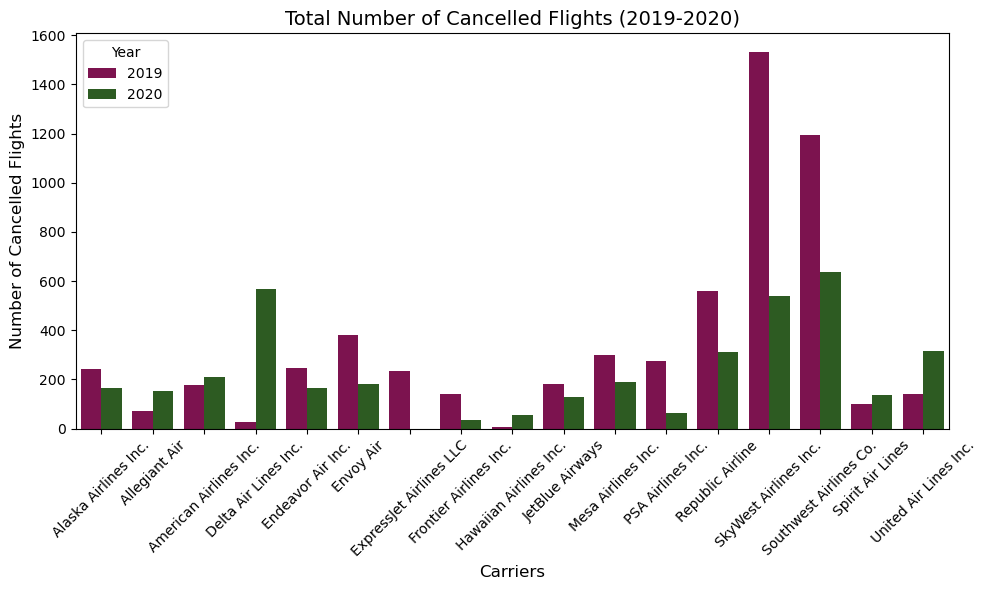

In [25]:
cancelled_flights = df.groupby(['carrier_name','year'])['arr_cancelled'].sum().reset_index()
# Create bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x='carrier_name', y='arr_cancelled', data=cancelled_flights, hue='year', palette='PiYG')

# Customize bar plot
plt.xlabel('Carriers', fontsize=12)
plt.ylabel('Number of Cancelled Flights', fontsize=12)
plt.title('Total Number of Cancelled Flights (2019-2020)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Display the plot
plt.legend(title="Year", loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()

**Total number of diverted flights by carrier**

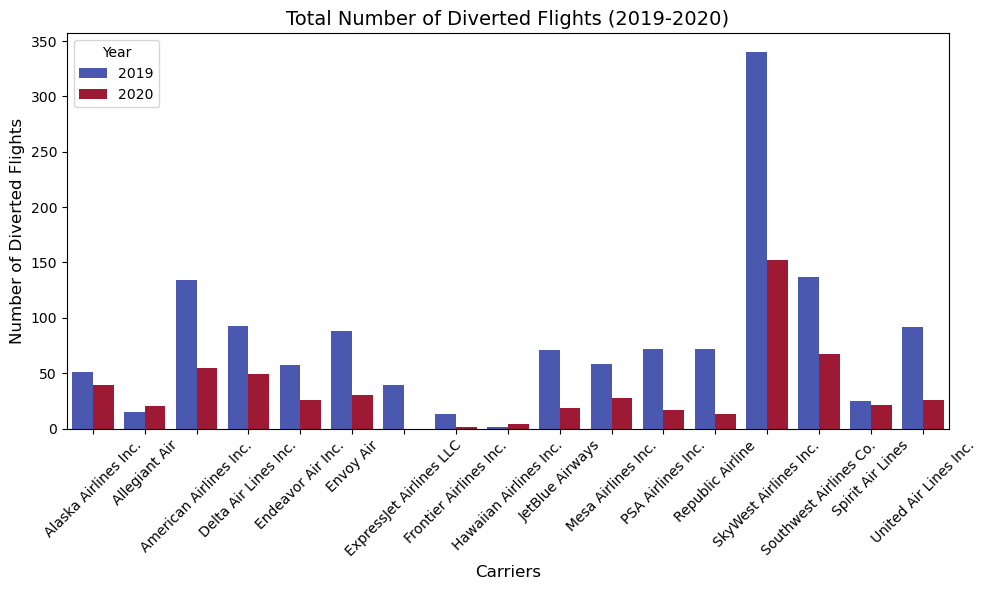

In [26]:
diverted_flights = df.groupby(['carrier_name','year'])['arr_diverted'].sum().reset_index()
# Create bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x='carrier_name', y='arr_diverted', data=diverted_flights, hue='year', palette='coolwarm')

# Customize bar plot
plt.xlabel('Carriers', fontsize=12)
plt.ylabel('Number of Diverted Flights', fontsize=12)
plt.title('Total Number of Diverted Flights (2019-2020)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Display the plot
plt.legend(title="Year", loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()

### Model Predictions

To build the model, we can create new features based on the existing columns and then preprocess the data. In this case, we can create a few new features that might be useful for predicting flight delays:

**Percentage of Delayed Flights by Carrier:**  This feature represents the percentage of flights delayed by each carrier. It can help the model understand the carrier's historical performance in terms of delays.

**Percentage of Delayed Flights by Airport:**  Similar to the carrier feature, this feature represents the percentage of delayed flights at each airport.

**Total Delay Minutes per Flight:**  This feature calculates the average delay time per flight, which can give insights into how much delay passengers might expect on average for a given flight.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import clone
from sklearn.metrics import f1_score, balanced_accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

In [49]:
# Create a copy of the original dataframe
data_copy = df.copy()

# 1. Percentage of Delayed Flights by Carrier
carrier_delayed_percent = data_copy.groupby('carrier_name')['arr_del15'].mean().reset_index()
carrier_delayed_percent.rename(columns={'arr_del15': 'carrier_delayed_percent'}, inplace=True)

# 2. Percentage of Delayed Flights by Airport
airport_delayed_percent = data_copy.groupby('airport_name')['arr_del15'].mean().reset_index()
airport_delayed_percent.rename(columns={'arr_del15': 'airport_delayed_percent'}, inplace=True)

# 3. Total Delay Minutes per Flight
data_copy['avg_delay_per_flight'] = data_copy['arr_delay'] / data_copy['arr_flights']

# Select features for modeling
selected_features = [
    'year', 'month', 'carrier', 'airport', 'arr_flights', 'carrier_ct',
    'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
    'late_aircraft_delay', 'avg_delay_per_flight'
]

# Combine the new features with the selected features
X = data_copy[selected_features]

# Target variable
y = data_copy['arr_del15']

# Perform one-hot encoding for categorical variables (carrier, airport)
X = pd.get_dummies(X, columns=['carrier', 'airport'], drop_first=True)

# Now, you can split the data into training and testing sets and build your predictive model.

In [50]:
data_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay_per_flight
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0,2.022727
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0,0.255556
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0,3.840909
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0,2.760870
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0,9.105263


In [51]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0


### RandomForest Regressor

Time to build a RandomForestRegressor and test its accuracy

In [52]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45) 

In [53]:
# Create and train the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=500, max_depth=50, random_state=45)
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics for training and test data
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R2):", train_r2)
print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R2):", test_r2)

Training Set Metrics:
Mean Squared Error (MSE): 90.7543367253732
Root Mean Squared Error (RMSE): 9.526507057960604
R-squared (R2): 0.9960300901838974

Test Set Metrics:
Mean Squared Error (MSE): 113.17332839344267
Root Mean Squared Error (RMSE): 10.638295370661725
R-squared (R2): 0.9927418894923743


### RandomForest Classifier

In [54]:
# Define the models with the specified parameters
models_dict = {
    "rfc": RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=3, min_samples_leaf=2, bootstrap=True, class_weight='balanced', random_state=45),
}


In [55]:
def create_pipeline(classifier):
    pipe = make_pipeline(
        MinMaxScaler(), 
        classifier
    )
    return pipe

trained_pipes = {}

Model: RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=45)



/home/swetha/miniconda3/envs/pylearn/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross validated mean F1 Score = 0.016
Balanced Accuracy on Test set: 0.029
F1 Score on Test set: 0.015

Confusion Matrix:


/home/swetha/miniconda3/envs/pylearn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2446: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


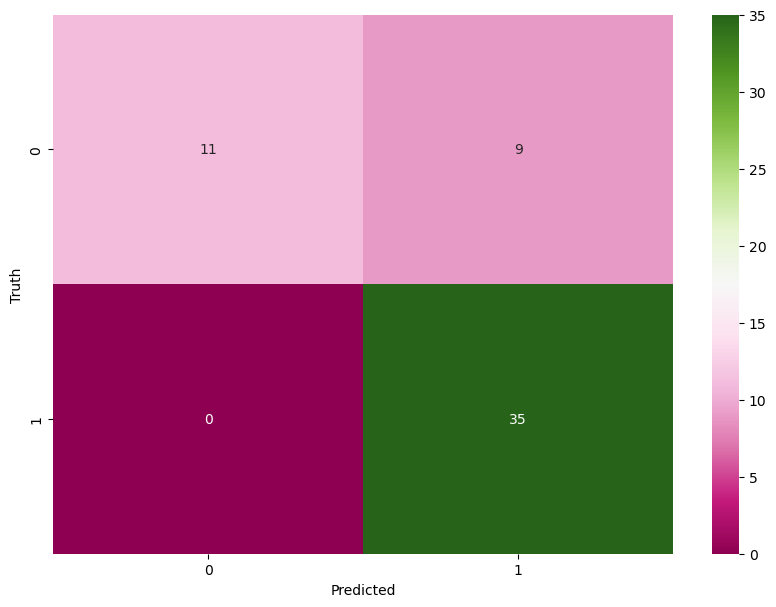


Classification report: 
              precision    recall  f1-score   support

           1       0.31      0.27      0.29        41
           0       0.78      1.00      0.88        35

   micro avg       0.57      0.61      0.59        76
   macro avg       0.54      0.63      0.58        76
weighted avg       0.52      0.61      0.56        76

----------------------------------------------------------------


In [56]:

for key, classifier in models_dict.items():
    print(f"Model: {classifier}\n")

    pipe = create_pipeline(classifier)
    # fit the pipeline on the transformed data
    pipe.fit(X_train.copy(), y_train)

    trained_pipes[key] = pipe

    # make predictions
    y_pred = pipe.predict(X_test.copy())

    # evaluate pipeline
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=45)
    cv_scores = cross_val_score(
        pipe, 
        X_train.copy(), 
        y_train, 
        scoring='f1_macro', 
        cv=cv, 
        n_jobs=-1
    )
    print(f"Cross validated mean F1 Score = {round(np.mean(cv_scores), 3)}")

    print(f"Balanced Accuracy on Test set: {round(balanced_accuracy_score(y_test, y_pred), 3)}")
    print(f"F1 Score on Test set: {round(f1_score(y_test, y_pred, average='macro'), 3)}\n")  # Added average='macro'

    print(f"Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    plt.figure(figsize=(10,7))
    sb.heatmap(cm, annot=True, fmt='d', cmap='PiYG')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

    print(f"\nClassification report: \n{classification_report(y_test, y_pred, labels=[1, 0])}")
    print("----------------------------------------------------------------")
